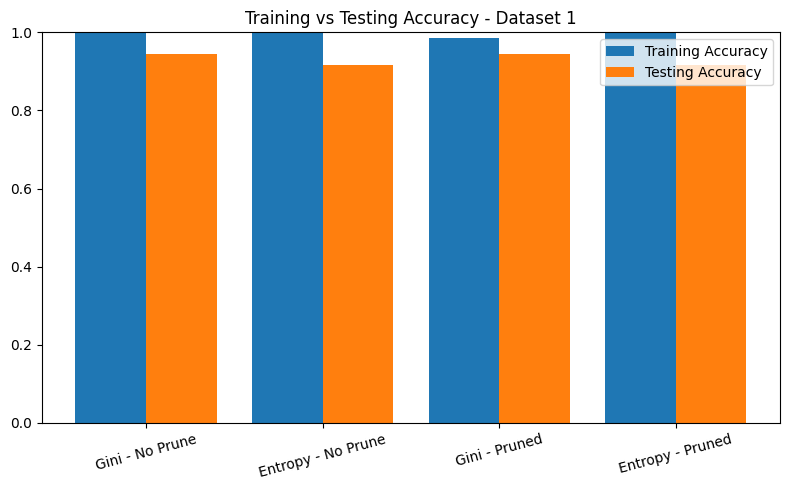

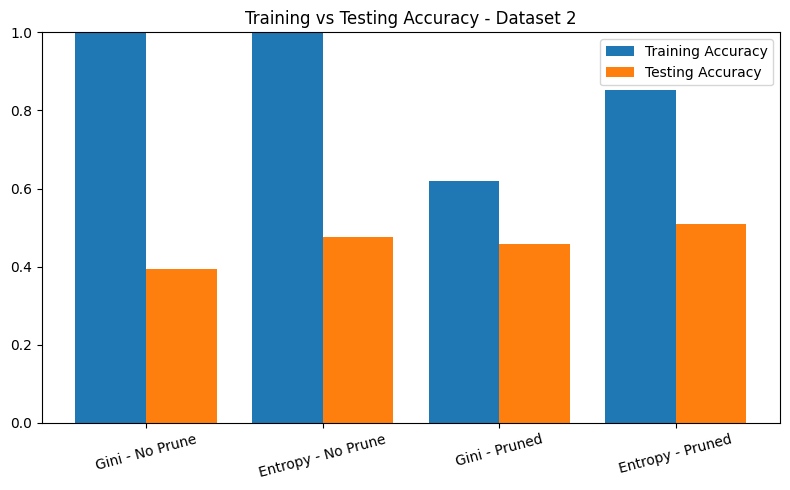


Actual vs Predicted (Entropy + Pruned) - Dataset 2:
     Actual  Predicted
179       0          0
228       3          0
111       1          2
246       2          0
60        2          1
9         1          2
119       2          1
223       3          1
268       1          0
33        0          1

Correctly Predict: 31 Out 61
Wrong Predictions: 30


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.classifier_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_valuracy_score


input_dataset1 = pd.read_csv('wine.csv')
X1 = input_dataset1.iloc[:, 1:]
Y1 = input_dataset1.iloc[:, 0]
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

input_dataset2 = pd.read_csv('heart_disease.csv')
X2 = input_dataset2.iloc[:, 0:13]
Y2 = input_dataset2.iloc[:, 13]
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)


def evaluate_classifier(classifier, Xtrain, Y_train, Xtest, Y_test, label):
    train_accuracy_val = classifier.score(Xtrain, Y_train)
    test_accuracy_val = classifier.score(Xtest, Y_test)
    print(f"{label} â†’ Train Acc: {train_accuracy_val:.3f}, Test Acc: {test_accuracy_val:.3f}")
    return train_accuracy_val, test_accuracy_val


def run_classifiers(Xtrain, Xtest, Y_train, Y_test, input_dataset_name):
    accuracy_val_train_list = []
    accuracy_val_test_list = []
    labels = ["Gini - No Prune", "Entropy - No Prune", "Gini - Pruned", "Entropy - Pruned"]


    DT1 = DecisionTreeClassifier(criterion='gini', random_state=42)
    DT1.fit(Xtrain, Y_train)
    accuracy_val_train_list.append(DT1.score(Xtrain, Y_train))
    accuracy_val_test_list.append(DT1.score(Xtest, Y_test))


    DT2 = DecisionTreeClassifier(criterion='entropy', random_state=42)
    DT2.fit(Xtrain, Y_train)
    accuracy_val_train_list.append(DT2.score(Xtrain, Y_train))
    accuracy_val_test_list.append(DT2.score(Xtest, Y_test))


    DT3 = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.015, random_state=42)
    DT3.fit(Xtrain, Y_train)
    accuracy_val_train_list.append(DT3.score(Xtrain, Y_train))
    accuracy_val_test_list.append(DT3.score(Xtest, Y_test))

    DT4 = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.015, random_state=42)
    DT4.fit(Xtrain, Y_train)
    accuracy_val_train_list.append(DT4.score(Xtrain, Y_train))
    accuracy_val_test_list.append(DT4.score(Xtest, Y_test))

    # Plot accuracy_valuracy
    x = np.arange(len(labels))
    plt.figure(figsize=(8, 5))
    plt.bar(x - 0.2, accuracy_val_train_list, 0.4, label='Training Accuracy')
    plt.bar(x + 0.2, accuracy_val_test_list, 0.4, label='Testing Accuracy')
    plt.xticks(x, labels, rotation=15)
    plt.ylim(0, 1)
    plt.title(f"Training vs Testing Accuracy - {input_dataset_name}")
    plt.legend()
    plt.tight_layout()
    plt.show()

    if input_dataset_name == "Dataset 2":
        Y_pred = DT4.predict(Xtest)
        correct = np.sum(Y_pred == Y_test)
        total = len(Y_test)
        wrong = total - correct

        print("\nActual vs Predicted (Entropy + Pruned) - Dataset 2:")
        result_input_dataset = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
        print(result_input_dataset.head(10))
        print(f"\nCorrectly Predict: {correct} Out {total}")
        print(f"Wrong Predictions: {wrong}")
run_classifiers(X1_train, X1_test, Y1_train, Y1_test, "Dataset 1")
run_classifiers(X2_train, X2_test, Y2_train, Y2_test, "Dataset 2")


In [ ]:
#Task 2
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Load input_dataset
input_dataset = pd.read_csv('loan_approval.csv')

# Encode all string columns into numeric labels
label_encoders = {}
for column in input_dataset.columns:
    if input_dataset[column].dtype == 'object':
        le = LabelEncoder()
        input_dataset[column] = le.fit_transform(input_dataset[column])
        label_encoders[column] = le

# Split into features and target
X = input_dataset.iloc[:, 0:5]   # ID, AGE, JOB_STATUS, OWNS_HOUSE, CREDIT_RATING
Y = input_dataset.iloc[:, 5]     # CLASS

# Train Decision Tree using entropy (similar to ID3)
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, Y)

# Identify root node feature
features = X.columns
root_feature_index = clf.tree_.feature[0]
root_feature = features[root_feature_index]

print(f"ðŸŒ¿ Root Node (using ID3 / entropy): {root_feature}")


ðŸŒ¿ Root Node (using ID3 / entropy): OWNS_HOUSE


In [32]:
#Task 3:
import pandas as pd
import numpy as np
import seaborn as sns

input_data=pd.read_csv('cancer_patient.csv')
input_data.head()

index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0            4                    2         2                      3   
1            3                    7         8                      6   
2            7                    9         2                      1   
3            2                    3         1                      4   
4            2                    4         1                      4   

   Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring   Level  
0                         1              2          3        4     Low  
1                         2              1          7        2  Medium  
2                         4              6          7        2    High  
3                         5              6          7        5    High  
4                         2              4          2        3    High  

[5 rows x 26 columns]

In [33]:
input_data.tail()

index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
995    995       P995   44       1              6            7             7   
996    996       P996   37       2              6            8             7   
997    997       P997   25       2              4            5             6   
998    998       P998   18       2              6            8             7   
999    999       P999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
995                     7             7                     6  ...        5   
996                     7             7                     6  ...        9   
997                     5             5                     4  ...        8   
998                     7             7                     6  ...        3   
999                     5             5                     4  ...        8   

     Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
995            3                    2         7                      8   
996            6                    5         7                      2   
997            7                    9         2                      1   
998            2                    4         1                      4   
999            7                    9         2                      1   

     Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring  Level  
995                         2              4          5        3   High  
996                         4              3          1        4   High  
997                         4              6          7        2   High  
998                         2              4          2        3   High  
999                         4              6          7        2   High  

[5 rows x 26 columns]

In [37]:
print(input_data.shape)
input_data.describe()

(1000, 26)


index          Age       Gender  Air Pollution  Alcohol use  \
count  1000.000000  1000.000000  1000.000000      1000.0000  1000.000000   
mean    499.500000    37.174000     1.402000         3.8400     4.563000   
std     288.819436    12.005493     0.490547         2.0304     2.620477   
min       0.000000    14.000000     1.000000         1.0000     1.000000   
25%     249.750000    27.750000     1.000000         2.0000     2.000000   
50%     499.500000    36.000000     1.000000         3.0000     5.000000   
75%     749.250000    45.000000     2.000000         6.0000     7.000000   
max     999.000000    73.000000     2.000000         8.0000     8.000000   

       Dust Allergy  OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
count   1000.000000           1000.000000   1000.000000           1000.000000   
mean       5.165000              4.840000      4.580000              4.380000   
std        1.980833              2.107805      2.126999              1.848518   
min        1.000000              1.000000      1.000000              1.000000   
25%        4.000000              3.000000      2.000000              3.000000   
50%        6.000000              5.000000      5.000000              4.000000   
75%        7.000000              7.000000      7.000000              6.000000   
max        8.000000              8.000000      7.000000              7.000000   

       Balanced Diet  ...  Coughing of Blood      Fatigue  Weight Loss  \
count    1000.000000  ...        1000.000000  1000.000000  1000.000000   
mean        4.491000  ...           4.859000     3.856000     3.855000   
std         2.135528  ...           2.427965     2.244616     2.206546   
min         1.000000  ...           1.000000     1.000000     1.000000   
25%         2.000000  ...           3.000000     2.000000     2.000000   
50%         4.000000  ...           4.000000     3.000000     3.000000   
75%         7.000000  ...           7.000000     5.000000     6.000000   
max         7.000000  ...           9.000000     9.000000     8.000000   

       Shortness of Breath     Wheezing  Swallowing Difficulty  \
count          1000.000000  1000.000000            1000.000000   
mean              4.240000     3.777000               3.746000   
std               2.285087     2.041921               2.270383   
min               1.000000     1.000000               1.000000   
25%               2.000000     2.000000               2.000000   
50%               4.000000     4.000000               4.000000   
75%               6.000000     5.000000               5.000000   
max               9.000000     8.000000               8.000000   

       Clubbing of Finger Nails  Frequent Cold    Dry Cough      Snoring  
count               1000.000000    1000.000000  1000.000000  1000.000000  
mean                   3.923000       3.536000     3.853000     2.926000  
std                    2.388048       1.832502     2.039007     1.474686  
min                    1.000000       1.000000     1.000000     1.000000  
25%                    2.000000       2.000000     2.000000     2.000000  
50%                    4.000000       3.000000     4.000000     3.000000  
75%                    5.000000       5.000000     6.000000     4.000000  
max                    9.000000       7.000000     7.000000     7.000000  

[8 rows x 24 columns]

In [39]:
print(input_data.columns)

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')


In [42]:
input_data.nunique()


index                       1000
Patient Id                  1000
Age                           40
Gender                         2
Air Pollution                  8
Alcohol use                    8
Dust Allergy                   8
OccuPational Hazards           8
Genetic Risk                   7
chronic Lung Disease           7
Balanced Diet                  7
Obesity                        7
Smoking                        8
Passive Smoker                 8
Chest Pain                     9
Coughing of Blood              9
Fatigue                        8
Weight Loss                    8
Shortness of Breath            8
Wheezing                       8
Swallowing Difficulty          8
Clubbing of Finger Nails       9
Frequent Cold                  7
Dry Cough                      7
Snoring                        7
Level                          3
dtype: int64

In [44]:
input_data['Air Pollution'].unique()


array([2, 3, 4, 7, 6, 5, 1, 8])

In [46]:
input_data.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [ ]:
#Question 4:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Load input_dataset
input_dataset = pd.read_csv('student.csv')

# Encode all string columns into numeric labels
for col in input_dataset.columns:
    if input_dataset[col].dtype == 'object':
        le = LabelEncoder()
        input_dataset[col] = le.fit_transform(input_dataset[col])


X = input_dataset.iloc[:, 1:4] 
Y = input_dataset.iloc[:, 4] 

# Train CART Decision Tree (Gini Index)
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X, Y)

# Get root node feature
features = X.columns
root_feature_index = clf.tree_.feature[0]
root_feature = features[root_feature_index]

print(f"ðŸŒ³ Root Node using CART (Gini): {root_feature}")


ðŸŒ³ Root Node using CART (Gini): Prior_Experience
